## Groupby
- sql groupby와 같음
- split -> apply -> combine
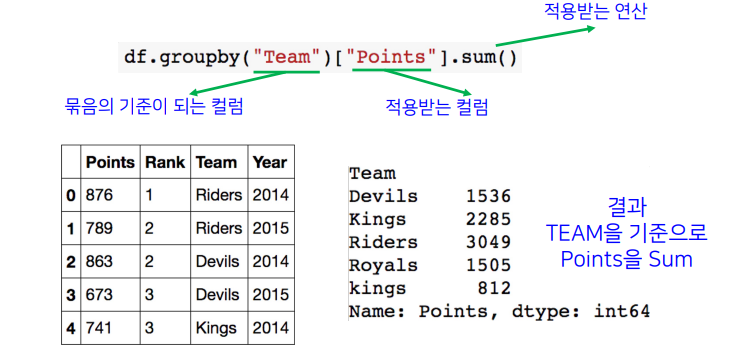

In [2]:
import pandas as pd
ipl_data={"Team":["riders","riders","devils","devils","kings","kings","riders","royals"],
         "rank":[1,2,2,3,3,4,1,1],
         "year":[2014,2015,2014,2015,2014,2015,2016,2017],
         "points":[623,123,654,376,964,345,776,347]}
df=pd.DataFrame(ipl_data)
df.groupby("Team")["points"].std()


Team
devils    196.575685
kings     437.699098
riders    341.520619
royals           NaN
Name: points, dtype: float64

## unstack
- group으로 묶여진 데이터를 matrix 형태로 변환

## swaplevel
- index level 변경

## grouped
- groupby에 의해 split된 상태 추출 가능
- aggregation: 요약된 통계정보 추출
- transformation: 해당 정보 변환
- filtration: 특정 정보 제거

In [11]:
grouped=df.groupby("Team")
for name,group in grouped:
    print(name)
    print(group)

devils
     Team  rank  year  points
2  devils     2  2014     654
3  devils     3  2015     376
kings
    Team  rank  year  points
4  kings     3  2014     964
5  kings     4  2015     345
riders
     Team  rank  year  points
0  riders     1  2014     623
1  riders     2  2015     123
6  riders     1  2016     776
royals
     Team  rank  year  points
7  royals     1  2017     347


In [12]:
grouped.get_group("devils")

,Team,rank,year,points
2,devils,2,2014,654
3,devils,3,2015,376


In [15]:
grouped.agg(max)

,rank,year,points
Team,,,
devils,3,2015,654
kings,4,2015,964
riders,2,2016,776
royals,1,2017,347


In [18]:
#모든 score 값
score=lambda x:(x.max())
grouped.transform(score)

,rank,year,points
0,2,2016,776
1,2,2016,776
2,3,2015,654
3,3,2015,654
4,4,2015,964
5,4,2015,964
6,2,2016,776
7,1,2017,347


In [23]:
#포인트 합이 300 이상인 팀
df.groupby('Team').filter(lambda x:x['points'].sum()>500)

,Team,rank,year,points
0,riders,1,2014,623
1,riders,2,2015,123
2,devils,2,2014,654
3,devils,3,2015,376
4,kings,3,2014,964
5,kings,4,2015,345
6,riders,1,2016,776


In [3]:
df_phone=pd.read_csv("phone_data.csv")
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


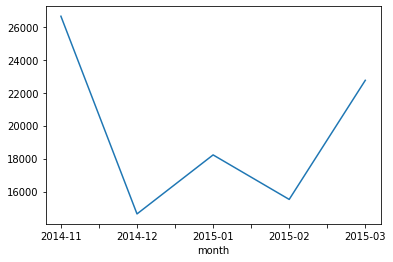

In [5]:
df_phone.groupby("month")["duration"].sum().plot()
#달마다 duration 합

In [11]:
import numpy as np
grouped=df_phone.groupby("month").agg({"duration":[min,max,np.mean]})
grouped.columns=grouped.columns.droplevel(level=0)
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [13]:
#add_prefix: prefix 추가
grouped.add_prefix("duration_")

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


## Pivot table
- index 축은 엑셀과 동일
- Value에 numeric 값을 집계함

In [15]:
# 가로: month, item 세로: network, 집계함수(sum), none값은 0으로 처리
df_phone.pivot_table(values=["duration"],index=[df_phone.month,df_phone.item],columns=df_phone.network,aggfunc="sum",fill_value=0)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

In [17]:
#똑같은 그래를 groupby로 
df_phone.groupby(["month","item","network"])["duration"].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

## Crosstab
- 두 칼럼의 교차 빈도, 비율, 덧셈 등을 구할 때 사용
- pivot table의 특수 형태

## merge & concat
### - merge: 두개의 데이터를 하나로 합침
- pd.merge(df_a,df_b,on='칼럼이름')
- join: inner join, full join, left,right join

### - concat: 같은 형태의 데이터를 붙임
- pd.concat(df_a,df_b)
- df_a.append(df_b)

## case

In [26]:
import os
files=[file_name for file_name in os.listdir(os.getcwd()) if file_name.endswith("csv")]
files

['phone_data.csv', 'wages.csv', '전국+유동인구+현황.csv']

## database connection

In [ ]:
import sqlite3

conn=sqlite3.connect("flights.db")
cur=conn.cursor()
cur.execute("select * from airlines limit 5;")
results=cur.fetchall()
results

In [ ]:
# db에서 뽑아낸 정보 엑셀로 저장
# dataframe의 엑셀 추출 코드
writer=pd.ExcelWriter("df_routes.xlsx",engine='xlsxwriter')
df_routes.to_excel(writer,sheet_name="Sheet1")

In [ ]:
# 일반적인 파이썬 파일 persistence
# to_pickle, read_pickle 함수
df_routes.to_pickle("df_routes.pickle")

df_routes_pickle=pd.read_pickle("df_routes.pickle")
df_routes_pickle.head()